<a href="https://colab.research.google.com/github/IntroComputationalPhysics-UNT/period-and-revolution-time-rigid-pendulum-GavinDunaway410/blob/Assignment-Complete/Period_and_Revolution_Time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pseudocode
 * Step 1. Import modules
 * Step 2. Define constants/functions
 * Step 3. Run `solve_ivp` and the `quad` function to calculate `T` and `T_rev`
 * Step 4. Graph the results

In [25]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.integrate import quad

In [26]:
# Define Constants
I  = 1.0
g = 9.81
L = 1.0
omega_0 = np.sqrt(g/L)

# Differential equation
def pendulum_ode(t,y):
  theta, theta_dot = y
  dtheta_dt = theta_dot
  dtheta_dot_dt = omega_0**2 * np.sin(theta)
  return [dtheta_dt, dtheta_dot_dt]

# Energy calculation
def energy(theta, theta_dot):
  return 0.5 * I * theta_dot**2 + I * omega_0**2 * (1-np.cos(theta))

# Detect when it peaks
def period_event(t,y):
  theta, theta_dot = y
  return theta_dot

period_event.direction = 1
period_event.terminal = False

# Detect full revolution
def rev_event(t,y):
  theta, theta_dot = y
  return theta - 2 * np.pi

rev_event.direction = 1
rev_event.terminal = True

Period (P-P): 3.0652 s
No revolutions detected


/tmp/ipython-input-3346807839.py:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


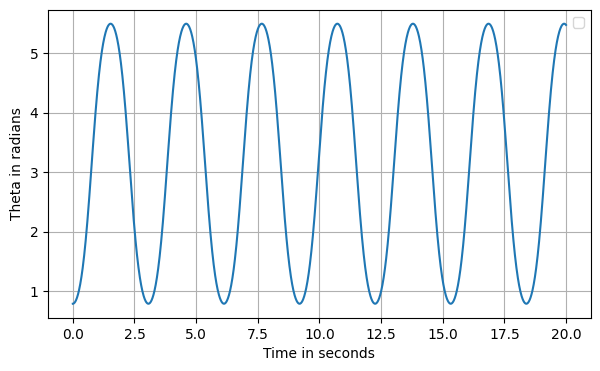

In [27]:
# Initial conditions
theta_0 = np.deg2rad(45)
theta_dot_0 = 0.0
y_0 = [theta_0, theta_dot_0]

# Time span
t_span = (0, 20)
t_eval = np.linspace(t_span[0], t_span[1], 2000)

# Certified Calculations Zone (Liberal Arts Majors Do Not Enter)
sol = solve_ivp(pendulum_ode, t_span, y_0, t_eval=t_eval, events = [period_event, rev_event], rtol = 1e-9, atop = 1e-9)

# Turn the solutions into something useful
t = sol.t
theta = sol.y[0]
theta_dot = sol.y[1]

# Period
period_t = sol.t_events[0]
if len(period_t) > 1:
  period = period_t[1] - period_t[0]
else:
  period = None

# Revolutions
if len(sol.t_events[1]) > 0:
  rev_t = sol.t_events[1][0]
else:
  rev_t = None

# Print it out
print(f"Period (P-P): {period:.4f} s" if period else "No period detected")
print(f"Revolution Time: {rev_t:.4f} s" if rev_t else "No revolutions detected")

# Plot results (visualization !!!1!!1!)
plt.figure(figsize = (7,4))
plt.plot(t, theta,)
plt.xlabel('Time in seconds')
plt.ylabel('Theta in radians')
plt.legend()
plt.grid(True)
plt.show()

Nonlinear Period: 2.0863 s
Small Angle: 2.0060666807106475 s
T/T_saa = 1.0400


/tmp/ipython-input-2677379458.py:4: RuntimeWarning: divide by zero encountered in scalar divide
  return 1.0/ np.sqrt(np.cos(theta) - np.cos(theta_0))
/tmp/ipython-input-2677379458.py:8: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  integral, _ = quad(integrand, 0, theta_0, args=(theta_0,))


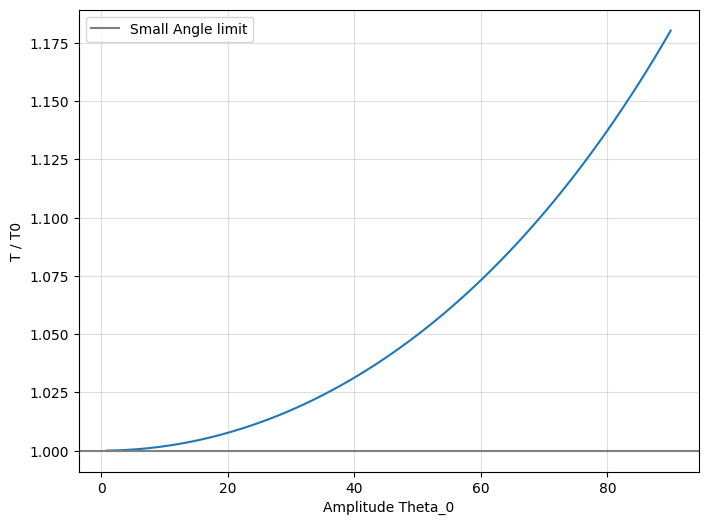

In [28]:
# Using quad method
# define integrand
def integrand(theta, theta_0):
  return 1.0/ np.sqrt(np.cos(theta) - np.cos(theta_0))

# Compute period
def nonlinear_period(theta_0):
  integral, _ = quad(integrand, 0, theta_0, args=(theta_0,))
  T = 4 * np.sqrt(L / (2 * g)) * integral
  return T

# Parameters
theta_0 = np.deg2rad(45)
T = nonlinear_period(theta_0)

# Small angle approx.
T_saa = 2 * np.pi * np.sqrt(L/g)

print(f"Nonlinear Period: {T:.4f} s")
print(f"Small Angle: {T_saa} s")
print(f"T/T_saa = {T/T_saa:.4f}")

# Calcaulate period for many theta_0
theta_0_range = np.linspace(np.deg2rad(0), np.deg2rad(90), 100)
T_range = [nonlinear_period(t0) for t0 in theta_0_range]
T_0 = 2 * np.pi * np.sqrt(L/g)

# Plot results
plt.figure(figsize=(8, 6))
plt.plot(np.rad2deg(theta_0_range), T_range / T_0)
plt.axhline(1, color='gray', label='Small Angle limit')
plt.xlabel('Amplitude Theta_0')
plt.ylabel('T / T0')
plt.grid(True, alpha=0.4)
plt.legend()
plt.show()

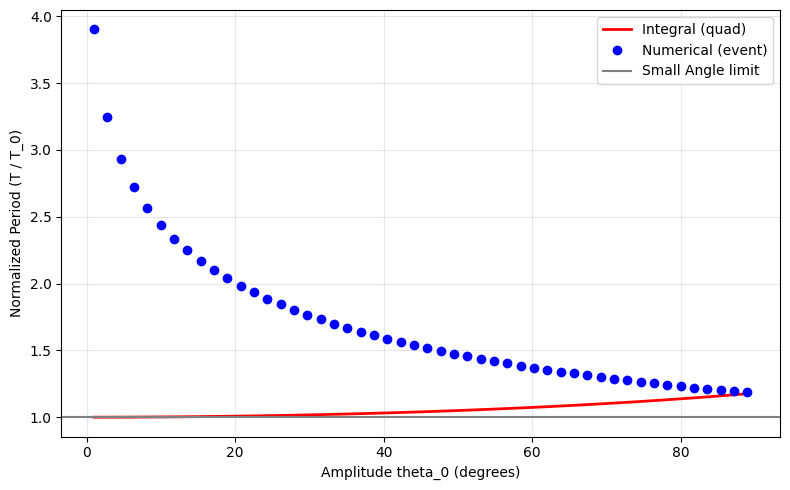

In [29]:
# Plot and compare

# Calculate period for a range of initial angles using both methods
theta_0_range = np.linspace(np.deg2rad(1), np.deg2rad(89), 50)
T_quad = [nonlinear_period(t0) for t0 in theta_0_range]

T_solve_ivp = []
for t_0 in theta_0_range:
    y_0 = [t_0, 0.0]
    sol = solve_ivp(pendulum_ode, [0, 20], y_0, events=[period_event], rtol=1e-9, atol=1e-9)
    period_times = sol.t_events[0]
    if len(period_times) > 1:
        T_solve_ivp.append(period_times[1] - period_times[0])
    else:
        T_solve_ivp.append(np.nan)

T_quad = np.array(T_quad)
T_solve_ivp = np.array(T_solve_ivp)
T_0 = 2 * np.pi * np.sqrt(L/g)


plt.figure(figsize=(8,5))
plt.plot(np.rad2deg(theta_0_range), T_quad/T_0, 'r-', lw=2, label='Integral (quad)')
plt.plot(np.rad2deg(theta_0_range), T_solve_ivp/T_0, 'bo', label='Numerical (event)')
plt.axhline(1, color='gray', label='Small Angle limit')
plt.xlabel('Amplitude theta_0 (degrees)')
plt.ylabel('Normalized Period (T / T_0)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

I don't know why the graph is showing up like this, nothing I try seems to work.